In [1]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import os
import csv
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score, classification_report, confusion_matrix , accuracy_score, precision_score, recall_score, f1_score, roc_curve ,roc_auc_score,ConfusionMatrixDisplay
# from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
Eating = "C:/Users/Aditya/Downloads/CVCP/CV_DATASET/Eating_Images"
Walking= "C:/Users/Aditya/Downloads/CVCP/CV_DATASET/Walking Images"
ChitChat="C:/Users/Aditya/Downloads/CVCP/CV_DATASET/Chit chat"

In [3]:
i=0
for filename in os.listdir(Eating):
    img = cv2.imread(os.path.join(Eating, filename))
    if img is not None:
        resize=(256,256)
        img=cv2.resize(img,resize)
        #grayscaling the image dataset
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img2 = cv2.GaussianBlur(gray, (5, 5), 0)  # gaussian Image

        # creating a Histograms Equalization for folder1(Fall)
        equ = cv2.equalizeHist(img2)

        # cv2.imshow('Chain Snatching Detection', equ)

        #Applyed
       
        kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
        kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
        img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
        img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
        img_prewitt = img_prewittx + img_prewitty

        #Applying Sift  Discriptor Abnormal folder
        sift = cv2.SIFT_create()
        kp, des = sift.detectAndCompute(img_prewitt, None)

        #convert the descriptor array into a dataframe format
        out = pd.DataFrame(des)
        print("descriptor shape ", i, " : ", out.shape)
        i = i + 1

        csv_data = out.to_csv('Eating.csv', mode='a', header=False, index=False)


descriptor shape  0  :  (673, 128)
descriptor shape  1  :  (724, 128)
descriptor shape  2  :  (377, 128)
descriptor shape  3  :  (314, 128)
descriptor shape  4  :  (467, 128)
descriptor shape  5  :  (428, 128)
descriptor shape  6  :  (444, 128)
descriptor shape  7  :  (601, 128)
descriptor shape  8  :  (430, 128)
descriptor shape  9  :  (571, 128)
descriptor shape  10  :  (601, 128)
descriptor shape  11  :  (510, 128)
descriptor shape  12  :  (328, 128)
descriptor shape  13  :  (640, 128)
descriptor shape  14  :  (554, 128)
descriptor shape  15  :  (391, 128)
descriptor shape  16  :  (591, 128)
descriptor shape  17  :  (378, 128)
descriptor shape  18  :  (377, 128)
descriptor shape  19  :  (630, 128)
descriptor shape  20  :  (523, 128)
descriptor shape  21  :  (346, 128)
descriptor shape  22  :  (632, 128)
descriptor shape  23  :  (531, 128)
descriptor shape  24  :  (761, 128)
descriptor shape  25  :  (419, 128)
descriptor shape  26  :  (691, 128)
descriptor shape  27  :  (549, 128)
de

descriptor shape  226  :  (432, 128)
descriptor shape  227  :  (237, 128)
descriptor shape  228  :  (513, 128)
descriptor shape  229  :  (485, 128)
descriptor shape  230  :  (487, 128)
descriptor shape  231  :  (498, 128)
descriptor shape  232  :  (442, 128)
descriptor shape  233  :  (455, 128)
descriptor shape  234  :  (356, 128)
descriptor shape  235  :  (456, 128)
descriptor shape  236  :  (397, 128)
descriptor shape  237  :  (215, 128)
descriptor shape  238  :  (463, 128)
descriptor shape  239  :  (391, 128)
descriptor shape  240  :  (456, 128)
descriptor shape  241  :  (543, 128)
descriptor shape  242  :  (388, 128)
descriptor shape  243  :  (436, 128)
descriptor shape  244  :  (566, 128)
descriptor shape  245  :  (771, 128)
descriptor shape  246  :  (272, 128)
descriptor shape  247  :  (705, 128)
descriptor shape  248  :  (470, 128)
descriptor shape  249  :  (686, 128)
descriptor shape  250  :  (327, 128)
descriptor shape  251  :  (626, 128)
descriptor shape  252  :  (463, 128)
d

In [4]:
i=0
for filename in os.listdir(Walking):
    img = cv2.imread(os.path.join(Walking, filename))
    if img is not None:
        resize=(256,256)
        img=cv2.resize(img,resize)
        #grayscaling the image dataset
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img2 = cv2.GaussianBlur(gray, (5, 5), 0)  # gaussian Image

        # creating a Histograms Equalization for folder1(Fall)
        equ = cv2.equalizeHist(img2)

        # cv2.imshow('Chain Snatching Detection', equ)

        #Applyed
        
        kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
        kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
        img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
        img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
        img_prewitt = img_prewittx + img_prewitty

        #Applying Sift  Discriptor Abnormal folder
        sift = cv2.SIFT_create()
        kp, des = sift.detectAndCompute(img_prewitt, None)

        #convert the descriptor array into a dataframe format
        out = pd.DataFrame(des)
        print("descriptor shape ", i, " : ", out.shape)
        i = i + 1

        csv_data = out.to_csv('Walking.csv', mode='a', header=False, index=False)

descriptor shape  0  :  (68, 128)
descriptor shape  1  :  (53, 128)
descriptor shape  2  :  (221, 128)
descriptor shape  3  :  (598, 128)
descriptor shape  4  :  (127, 128)
descriptor shape  5  :  (53, 128)
descriptor shape  6  :  (298, 128)
descriptor shape  7  :  (99, 128)
descriptor shape  8  :  (107, 128)
descriptor shape  9  :  (158, 128)
descriptor shape  10  :  (453, 128)
descriptor shape  11  :  (503, 128)
descriptor shape  12  :  (1838, 128)
descriptor shape  13  :  (185, 128)
descriptor shape  14  :  (408, 128)
descriptor shape  15  :  (277, 128)
descriptor shape  16  :  (148, 128)
descriptor shape  17  :  (393, 128)
descriptor shape  18  :  (99, 128)
descriptor shape  19  :  (130, 128)
descriptor shape  20  :  (128, 128)
descriptor shape  21  :  (67, 128)
descriptor shape  22  :  (181, 128)
descriptor shape  23  :  (1354, 128)
descriptor shape  24  :  (571, 128)
descriptor shape  25  :  (571, 128)
descriptor shape  26  :  (284, 128)
descriptor shape  27  :  (226, 128)
descri

descriptor shape  226  :  (202, 128)
descriptor shape  227  :  (203, 128)
descriptor shape  228  :  (247, 128)
descriptor shape  229  :  (199, 128)
descriptor shape  230  :  (136, 128)
descriptor shape  231  :  (93, 128)
descriptor shape  232  :  (187, 128)
descriptor shape  233  :  (419, 128)
descriptor shape  234  :  (298, 128)
descriptor shape  235  :  (1100, 128)
descriptor shape  236  :  (172, 128)
descriptor shape  237  :  (106, 128)
descriptor shape  238  :  (411, 128)
descriptor shape  239  :  (455, 128)
descriptor shape  240  :  (170, 128)
descriptor shape  241  :  (91, 128)
descriptor shape  242  :  (123, 128)
descriptor shape  243  :  (179, 128)
descriptor shape  244  :  (252, 128)
descriptor shape  245  :  (281, 128)
descriptor shape  246  :  (213, 128)
descriptor shape  247  :  (329, 128)
descriptor shape  248  :  (368, 128)
descriptor shape  249  :  (446, 128)
descriptor shape  250  :  (570, 128)
descriptor shape  251  :  (326, 128)
descriptor shape  252  :  (83, 128)
des

In [5]:
i=0
for filename in os.listdir(ChitChat):
    img = cv2.imread(os.path.join(ChitChat, filename))
    if img is not None:
        resize=(256,256)
        img=cv2.resize(img,resize)
        #grayscaling the image dataset
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img2 = cv2.GaussianBlur(gray, (5, 5), 0)  # gaussian Image

        # creating a Histograms Equalization for folder1(Fall)
        equ = cv2.equalizeHist(img2)

        # cv2.imshow('Chain Snatching Detection', equ)

        #Applyed
        kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
        kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
        img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
        img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
        img_prewitt = img_prewittx + img_prewitty


        #Applying Sift  Discriptor Abnormal folder
        sift = cv2.SIFT_create()
        kp, des = sift.detectAndCompute(img_prewitt, None)

        #convert the descriptor array into a dataframe format
        out = pd.DataFrame(des)
        print("descriptor shape ", i, " : ", out.shape)
        i = i + 1

        csv_data = out.to_csv('ChitChat.csv', mode='a', header=False, index=False)

descriptor shape  0  :  (710, 128)
descriptor shape  1  :  (913, 128)
descriptor shape  2  :  (684, 128)
descriptor shape  3  :  (634, 128)
descriptor shape  4  :  (730, 128)
descriptor shape  5  :  (827, 128)
descriptor shape  6  :  (533, 128)
descriptor shape  7  :  (1091, 128)
descriptor shape  8  :  (885, 128)
descriptor shape  9  :  (488, 128)
descriptor shape  10  :  (778, 128)
descriptor shape  11  :  (596, 128)
descriptor shape  12  :  (810, 128)
descriptor shape  13  :  (569, 128)
descriptor shape  14  :  (727, 128)
descriptor shape  15  :  (944, 128)
descriptor shape  16  :  (768, 128)
descriptor shape  17  :  (1187, 128)
descriptor shape  18  :  (1029, 128)
descriptor shape  19  :  (996, 128)
descriptor shape  20  :  (622, 128)
descriptor shape  21  :  (726, 128)
descriptor shape  22  :  (733, 128)
descriptor shape  23  :  (1002, 128)
descriptor shape  24  :  (748, 128)
descriptor shape  25  :  (874, 128)
descriptor shape  26  :  (886, 128)
descriptor shape  27  :  (677, 128

descriptor shape  224  :  (1612, 128)
descriptor shape  225  :  (1681, 128)
descriptor shape  226  :  (1877, 128)
descriptor shape  227  :  (1172, 128)
descriptor shape  228  :  (1411, 128)
descriptor shape  229  :  (1156, 128)
descriptor shape  230  :  (875, 128)
descriptor shape  231  :  (1395, 128)
descriptor shape  232  :  (776, 128)
descriptor shape  233  :  (478, 128)
descriptor shape  234  :  (1099, 128)
descriptor shape  235  :  (591, 128)
descriptor shape  236  :  (504, 128)
descriptor shape  237  :  (548, 128)
descriptor shape  238  :  (632, 128)
descriptor shape  239  :  (562, 128)
descriptor shape  240  :  (479, 128)
descriptor shape  241  :  (535, 128)
descriptor shape  242  :  (532, 128)
descriptor shape  243  :  (463, 128)
descriptor shape  244  :  (515, 128)
descriptor shape  245  :  (535, 128)
descriptor shape  246  :  (634, 128)
descriptor shape  247  :  (577, 128)
descriptor shape  248  :  (502, 128)
descriptor shape  249  :  (476, 128)
descriptor shape  250  :  (634

descriptor shape  444  :  (710, 128)
descriptor shape  445  :  (492, 128)
descriptor shape  446  :  (926, 128)
descriptor shape  447  :  (590, 128)
descriptor shape  448  :  (1067, 128)
descriptor shape  449  :  (592, 128)
descriptor shape  450  :  (451, 128)
descriptor shape  451  :  (1003, 128)
descriptor shape  452  :  (1082, 128)
descriptor shape  453  :  (370, 128)
descriptor shape  454  :  (945, 128)
descriptor shape  455  :  (469, 128)
descriptor shape  456  :  (866, 128)
descriptor shape  457  :  (481, 128)
descriptor shape  458  :  (791, 128)
descriptor shape  459  :  (606, 128)
descriptor shape  460  :  (864, 128)
descriptor shape  461  :  (658, 128)
descriptor shape  462  :  (646, 128)
descriptor shape  463  :  (483, 128)
descriptor shape  464  :  (682, 128)
descriptor shape  465  :  (1070, 128)
descriptor shape  466  :  (1042, 128)
descriptor shape  467  :  (686, 128)
descriptor shape  468  :  (611, 128)


In [6]:
data1 = pd.read_csv('Eating.csv', dtype='uint8',header=None)
data2 = pd.read_csv('Walking.csv', dtype='uint8',header=None)
data3 = pd.read_csv('ChitChat.csv', dtype='uint8',header=None)

In [7]:
data1

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0,0,0,0,0,0,0,0,9,0,...,1,0,24,37,0,1,37,91,37,3
1,0,0,0,0,0,0,0,0,65,0,...,2,4,25,10,0,1,72,85,19,6
2,0,0,0,0,0,0,0,0,46,0,...,0,33,29,6,2,45,139,30,0,8
3,21,51,60,16,12,1,0,0,68,68,...,0,3,0,0,0,10,26,0,0,0
4,62,44,1,1,0,0,2,2,83,58,...,0,5,0,0,0,6,102,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220016,5,2,3,0,0,0,0,5,30,1,...,8,25,0,0,7,21,5,17,44,18
220017,3,1,0,0,0,0,1,2,89,2,...,0,19,14,8,3,67,83,3,1,4
220018,3,1,0,0,0,0,0,2,106,4,...,0,11,10,9,4,71,77,6,2,1
220019,22,0,0,0,0,0,0,6,146,0,...,0,0,0,0,10,25,2,0,0,0


In [8]:
data2

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,3,3,6,21,64,107,41,16,1,0,...,0,0,36,100,73,19,3,2,2,8
1,0,0,0,0,0,0,2,1,0,0,...,3,0,0,1,5,8,1,0,3,3
2,15,0,0,0,0,0,0,4,150,0,...,21,39,4,1,7,25,58,59,30,11
3,41,29,33,32,36,25,32,33,6,3,...,0,1,0,0,0,0,76,26,0,0
4,0,127,44,0,0,3,1,0,6,127,...,4,1,0,15,60,56,22,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101449,95,82,0,0,0,0,0,1,73,55,...,0,0,0,0,0,0,33,3,0,0
101450,21,1,0,0,0,0,0,1,150,4,...,1,9,0,0,0,0,94,59,0,0
101451,26,11,1,0,0,0,0,1,149,42,...,0,14,0,0,0,9,28,2,0,0
101452,30,2,0,0,0,0,0,10,149,12,...,7,0,0,0,0,1,28,12,1,0


In [9]:
data3

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0,0,2,0,0,0,0,0,17,5,...,0,0,1,143,143,2,2,11,5,0
1,0,0,0,0,0,0,0,0,0,0,...,1,2,6,8,6,5,97,33,17,27
2,30,6,1,45,138,0,0,1,94,31,...,0,1,5,1,0,12,71,0,0,0
3,24,7,0,0,0,2,8,31,25,1,...,14,51,0,0,0,96,127,1,0,0
4,28,28,5,1,6,10,3,11,90,5,...,0,0,0,0,0,0,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408711,20,6,1,1,1,2,6,16,59,10,...,0,11,143,13,1,1,0,0,4,64
408712,19,13,4,1,1,4,3,5,122,82,...,1,9,53,19,80,19,1,9,41,107
408713,2,6,17,4,0,0,0,0,48,6,...,0,0,5,71,94,56,13,2,0,0
408714,6,0,0,0,7,5,2,12,2,0,...,0,3,2,1,2,6,54,14,5,4


In [10]:
#append all the class wise feature descriptor data into one data frame
data=data1.append(data2)

data

C:\Users\Aditya\AppData\Local\Temp\ipykernel_16780\3613364136.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data1.append(data2)


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0,0,0,0,0,0,0,0,9,0,...,1,0,24,37,0,1,37,91,37,3
1,0,0,0,0,0,0,0,0,65,0,...,2,4,25,10,0,1,72,85,19,6
2,0,0,0,0,0,0,0,0,46,0,...,0,33,29,6,2,45,139,30,0,8
3,21,51,60,16,12,1,0,0,68,68,...,0,3,0,0,0,10,26,0,0,0
4,62,44,1,1,0,0,2,2,83,58,...,0,5,0,0,0,6,102,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101449,95,82,0,0,0,0,0,1,73,55,...,0,0,0,0,0,0,33,3,0,0
101450,21,1,0,0,0,0,0,1,150,4,...,1,9,0,0,0,0,94,59,0,0
101451,26,11,1,0,0,0,0,1,149,42,...,0,14,0,0,0,9,28,2,0,0
101452,30,2,0,0,0,0,0,10,149,12,...,7,0,0,0,0,1,28,12,1,0


In [11]:
data=data2.append(data3)
data

C:\Users\Aditya\AppData\Local\Temp\ipykernel_16780\3845846524.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data2.append(data3)


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,3,3,6,21,64,107,41,16,1,0,...,0,0,36,100,73,19,3,2,2,8
1,0,0,0,0,0,0,2,1,0,0,...,3,0,0,1,5,8,1,0,3,3
2,15,0,0,0,0,0,0,4,150,0,...,21,39,4,1,7,25,58,59,30,11
3,41,29,33,32,36,25,32,33,6,3,...,0,1,0,0,0,0,76,26,0,0
4,0,127,44,0,0,3,1,0,6,127,...,4,1,0,15,60,56,22,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408711,20,6,1,1,1,2,6,16,59,10,...,0,11,143,13,1,1,0,0,4,64
408712,19,13,4,1,1,4,3,5,122,82,...,1,9,53,19,80,19,1,9,41,107
408713,2,6,17,4,0,0,0,0,48,6,...,0,0,5,71,94,56,13,2,0,0
408714,6,0,0,0,7,5,2,12,2,0,...,0,3,2,1,2,6,54,14,5,4


In [12]:
data

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,3,3,6,21,64,107,41,16,1,0,...,0,0,36,100,73,19,3,2,2,8
1,0,0,0,0,0,0,2,1,0,0,...,3,0,0,1,5,8,1,0,3,3
2,15,0,0,0,0,0,0,4,150,0,...,21,39,4,1,7,25,58,59,30,11
3,41,29,33,32,36,25,32,33,6,3,...,0,1,0,0,0,0,76,26,0,0
4,0,127,44,0,0,3,1,0,6,127,...,4,1,0,15,60,56,22,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408711,20,6,1,1,1,2,6,16,59,10,...,0,11,143,13,1,1,0,0,4,64
408712,19,13,4,1,1,4,3,5,122,82,...,1,9,53,19,80,19,1,9,41,107
408713,2,6,17,4,0,0,0,0,48,6,...,0,0,5,71,94,56,13,2,0,0
408714,6,0,0,0,7,5,2,12,2,0,...,0,3,2,1,2,6,54,14,5,4


In [13]:
#save appended data into a csv file
csv_data=data.to_csv('finalData.csv', mode='a', header=False,index=False)

In [14]:
#read the data from the previously saved csv file
data = pd.read_csv('finalData.csv',header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,3,3,6,21,64,107,41,16,1,0,...,0,0,36,100,73,19,3,2,2,8
1,0,0,0,0,0,0,2,1,0,0,...,3,0,0,1,5,8,1,0,3,3
2,15,0,0,0,0,0,0,4,150,0,...,21,39,4,1,7,25,58,59,30,11
3,41,29,33,32,36,25,32,33,6,3,...,0,1,0,0,0,0,76,26,0,0
4,0,127,44,0,0,3,1,0,6,127,...,4,1,0,15,60,56,22,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510165,20,6,1,1,1,2,6,16,59,10,...,0,11,143,13,1,1,0,0,4,64
510166,19,13,4,1,1,4,3,5,122,82,...,1,9,53,19,80,19,1,9,41,107
510167,2,6,17,4,0,0,0,0,48,6,...,0,0,5,71,94,56,13,2,0,0
510168,6,0,0,0,7,5,2,12,2,0,...,0,3,2,1,2,6,54,14,5,4


In [15]:
##    K meanse Clustring
#Applying Kmeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [16]:
#save the model to disk
import pickle
filename = 'Kmeans_CL_2_Model.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [17]:
#calculate histogram of trained kmeans
hist = np.histogram(kmeans.labels_,bins=[0,1,2,3])

print("Histogram of trained kmeans")
print(hist, "\n")

Histogram of trained kmeans
(array([155590, 132624, 221956], dtype=int64), array([0, 1, 2, 3])) 



In [18]:
#performing kmeans prediction on the Abnormal with the pretrained kmeans model

#initialising i=0; as it is the first class
i=0
data=[]
#k=0

for filename in os.listdir(Eating):
    #path
    path=os.path.join(Eating,filename)
    a=cv2.imread(path)

    #gray image
    gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)

    # creating a Histograms Equalization for folder1(Fall)
    equ = cv2.equalizeHist(gray)

    #Applyeda
  
    #Applying Sift  Discriptor Abnormal folder
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty    
    
    kp, descriptors = sift.detectAndCompute(img_prewitt, None)

    out=pd.DataFrame(descriptors)

    array_double = np.array(out, dtype=np.double)
    try:
        a=kmeans.predict(array_double)
    except:
        print(filename)
    hist=np.histogram(a,bins=[0,1,2,3])

    #append the dataframe into the array
    data.append(hist[0])


#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class
Output["Class"] = i
csv_data=Output.to_csv('finalEating.csv', mode='a',header=False,index=False)

In [19]:
#performing kmeans prediction on the Abnormal with the pretrained kmeans model

#initialising i=0; as it is the first class
i=1
data=[]
#k=0

for filename in os.listdir(Walking):
    #path
    path=os.path.join(Walking,filename)
    a=cv2.imread(path)

    #gray image
    gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)

    # creating a Histograms Equalization for folder1(Fall)
    equ = cv2.equalizeHist(gray)

    #Applyeda
  
    #Applying Sift  Discriptor Abnormal folder
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty    
    
    kp, descriptors = sift.detectAndCompute(img_prewitt, None)

    out=pd.DataFrame(descriptors)

    array_double = np.array(out, dtype=np.double)
    try:
        a=kmeans.predict(array_double)
    except:
        print(filename)
    hist=np.histogram(a,bins=[0,1,2,3])

    #append the dataframe into the array
    data.append(hist[0])


#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class
Output["Class"] = i
csv_data=Output.to_csv('finalWalking.csv', mode='a',header=False,index=False)

In [20]:
#performing kmeans prediction on the Abnormal with the pretrained kmeans model

#initialising i=0; as it is the first class
i=2
data=[]
#k=0

for filename in os.listdir(ChitChat):
    #path
    path=os.path.join(ChitChat,filename)
    a=cv2.imread(path)

    #gray image
    gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)

    # creating a Histograms Equalization for folder1(Fall)
    equ = cv2.equalizeHist(gray)

    #Applyeda
  
    #Applying Sift  Discriptor Abnormal folder
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty    
    
    kp, descriptors = sift.detectAndCompute(img_prewitt, None)

    out=pd.DataFrame(descriptors)

    array_double = np.array(out, dtype=np.double)
    try:
        a=kmeans.predict(array_double)
    except:
        print(filename)
    hist=np.histogram(a,bins=[0,1,2,3])

    #append the dataframe into the array
    data.append(hist[0])


#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class
Output["Class"] = i
csv_data=Output.to_csv('finalChitChat.csv', mode='a',header=False,index=False)

In [21]:
#Displaying the kmeans predicted data of folder1
print("Eating")
dat1= pd.read_csv('finalEating.csv',header=None)
print(dat1)

Eating
       0    1    2  3
0    180  100  107  0
1    189   95  101  0
2     90   70   89  0
3     69   88   56  0
4    150   55   91  0
..   ...  ...  ... ..
412  250   95  132  0
413  162  122  127  0
414  165  124   93  0
415   66   61   64  0
416  183  116  134  0

[417 rows x 4 columns]


In [22]:
#Displaying the kmeans predicted data of folder1
print("Walking")
dat2= pd.read_csv('finalWalking.csv',header=None)
print(dat2)

Walking
        0     1     2  3
0      78    32   176  1
1      60    30   149  1
2      45    36    52  1
3    3663  1082  2144  1
4     123    36   155  1
..    ...   ...   ... ..
415   104    54   254  1
416  1582   254  1897  1
417   103    38   144  1
418    39    16    45  1
419    42    11    53  1

[420 rows x 4 columns]


In [23]:
#Displaying the kmeans predicted data of folder1
print("Chit-Chat")
dat3= pd.read_csv('finalChitChat.csv',header=None)
print(dat3)

Chit-Chat
        0     1     2  3
0     399   539   846  2
1    1663  1379  1807  2
2     649   524   608  2
3     676   958  1473  2
4    1527  3173  5475  2
..    ...   ...   ... ..
464   423   584   669  2
465  3402  1838  2455  2
466  1349   894  1255  2
467  1097  1778  3711  2
468   263   266   390  2

[469 rows x 4 columns]


In [24]:
#appending All kmeans predicted data into 1 dataframe
B = dat1.append(dat2)
B

C:\Users\Aditya\AppData\Local\Temp\ipykernel_16780\1676112912.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  B = dat1.append(dat2)


,0,1,2,3
0,180,100,107,0
1,189,95,101,0
2,90,70,89,0
3,69,88,56,0
4,150,55,91,0
...,...,...,...,...
415,104,54,254,1
416,1582,254,1897,1
417,103,38,144,1
418,39,16,45,1


In [25]:
A = B.append(dat3)

C:\Users\Aditya\AppData\Local\Temp\ipykernel_16780\2751033233.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  A = B.append(dat3)


In [26]:
df=A

In [27]:
df

,0,1,2,3
0,180,100,107,0
1,189,95,101,0
2,90,70,89,0
3,69,88,56,0
4,150,55,91,0
...,...,...,...,...
464,423,584,669,2
465,3402,1838,2455,2
466,1349,894,1255,2
467,1097,1778,3711,2


In [28]:
df.head()

,0,1,2,3
0,180,100,107,0
1,189,95,101,0
2,90,70,89,0
3,69,88,56,0
4,150,55,91,0


In [29]:
df.tail()

,0,1,2,3
464,423,584,669,2
465,3402,1838,2455,2
466,1349,894,1255,2
467,1097,1778,3711,2
468,263,266,390,2


In [30]:
#save the predicted data into csv file
csv_data=A.to_csv('FinalF.csv', mode='a',header=False,index=False)

In [31]:
#read the data from the previously saved csv file
df = pd.read_csv("FinalF.csv",header=None)
df

,0,1,2,3
0,180,100,107,0
1,189,95,101,0
2,90,70,89,0
3,69,88,56,0
4,150,55,91,0
...,...,...,...,...
1301,423,584,669,2
1302,3402,1838,2455,2
1303,1349,894,1255,2
1304,1097,1778,3711,2


In [32]:
#Check for NaN under a single DataFrame column
df.isnull().values.any()

False

In [33]:
# statistical measures about the data
df.describe()

,0,1,2,3
count,1306.000000,1306.000000,1306.000000,1306.000000
mean,2378.606432,1188.933384,2099.077335,1.039816
std,11853.633094,3923.176566,8088.430298,0.823007
min,30.000000,5.000000,8.000000,0.000000
25%,132.000000,83.000000,98.000000,0.000000
50%,233.500000,137.000000,161.000000,1.000000
75%,675.500000,611.250000,780.750000,2.000000
max,224389.000000,46882.000000,142140.000000,2.000000


In [34]:
X = df.drop(columns=3, axis=1)
Y = df[3]

In [35]:
X

,0,1,2
0,180,100,107
1,189,95,101
2,90,70,89
3,69,88,56
4,150,55,91
...,...,...,...
1301,423,584,669
1302,3402,1838,2455
1303,1349,894,1255
1304,1097,1778,3711


In [36]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1301    2
1302    2
1303    2
1304    2
1305    2
Name: 3, Length: 1306, dtype: int64

In [37]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,
                                                 test_size=0.3, random_state = 0)
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", Y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", Y_test.shape)

Number transactions X_train dataset:  (914, 3)
Number transactions y_train dataset:  (914,)
Number transactions X_test dataset:  (392, 3)
Number transactions y_test dataset:  (392,)


In [38]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
#from sklearn.metrics import accuracy_score,f1_score, classification_report, confusion_matrix , accuracy_score, precision_score, recall_score, f1_score, roc_curve ,roc_auc_score,plot_confusion_matrix
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [39]:
#Importing required libraries

import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [40]:
#Loading the dataset
df = pd.read_csv("FinalF.csv",header=None) 
#df = data.frame
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [41]:
X

,0,1,2
0,180,100,107
1,189,95,101
2,90,70,89
3,69,88,56
4,150,55,91
...,...,...,...
1301,423,584,669
1302,3402,1838,2455
1303,1349,894,1255
1304,1097,1778,3711


In [42]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1301    2
1302    2
1303    2
1304    2
1305    2
Name: 3, Length: 1306, dtype: int64

In [43]:
k = 5
kf = KFold(n_splits=k, random_state=None)
model = RandomForestClassifier()
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.7748091603053435, 0.8697318007662835, 0.6590038314176245, 0.5440613026819924, 0.7049808429118773]
Avg accuracy : 0.7105173876166242


In [44]:
k = 5
kf = KFold(n_splits=k, random_state=None)
model=KNeighborsClassifier()
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.7366412213740458, 0.7164750957854407, 0.29118773946360155, 0.4827586206896552, 0.7164750957854407]
Avg accuracy : 0.5887075546196368


C:\Users\Aditya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Aditya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

In [45]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,
                                                 test_size=0.3, random_state = 0)
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", Y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", Y_test.shape)

Number transactions X_train dataset:  (914, 3)
Number transactions y_train dataset:  (914,)
Number transactions X_test dataset:  (392, 3)
Number transactions y_test dataset:  (392,)


In [46]:
modelRF = RandomForestClassifier()
modelRF.fit(X_train,Y_train)
# accuracy on training data
X_train_prediction = modelRF.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("Applying Random Forest")
#print('Accuracy on Train data : ', train_data_accuracy)

# print('Presion :',precision_score(X_train_prediction,Y_train))

# print('Recall :',recall_score(X_train_prediction,Y_train))

# print('F1 score : ', f1_score(X_train_prediction,Y_train))

# accuracy on test data
X_test_prediction = modelRF.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on Test data : ', test_data_accuracy)

print('Precision :', precision_score(Y_test, X_test_prediction, average='weighted'))

print('Recall :', recall_score(Y_test, X_test_prediction, average='weighted'))

print('F1 score : ', f1_score(Y_test, X_test_prediction, average='weighted'))


# get the confusion matrix
conf_mat = confusion_matrix(Y_test, X_test_prediction)
print("Confusion matrix:\n", conf_mat)





Applying Random Forest
Accuracy on Test data :  0.8112244897959183
Precision : 0.8149312429717447
Recall : 0.8112244897959183
F1 score :  0.8115587730759968
Confusion matrix:
 [[101  11   1]
 [ 13 100  16]
 [  7  26 117]]


In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

modelknn = KNeighborsClassifier()
modelknn.fit(X_train, Y_train)

# accuracy on training data
X_train_prediction = modelknn.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('\nResults obtained for the knn')
print('\nResults obtained on Training Data')
print('Accuracy on Train data : ', train_data_accuracy)

print('Presion :', precision_score(Y_train, X_train_prediction, average='weighted'))
print('Recall :', recall_score(Y_train, X_train_prediction, average='weighted'))
print('F1 score : ', f1_score(Y_train, X_train_prediction, average='weighted'))

# Accuracy on test data
X_test_prediction = modelknn.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('\nResults obtained on Testing Data')
print('Accuracy on Test data : ', test_data_accuracy)

print('Presion :', precision_score(Y_test, X_test_prediction, average='weighted'))
print('Recall :', recall_score(Y_test, X_test_prediction, average='weighted'))
print('F1 score : ', f1_score(Y_test, X_test_prediction, average='weighted'))
# get the confusion matrix
conf_mat = confusion_matrix(Y_test, X_test_prediction)
print("Confusion matrix:\n", conf_mat)



Results obtained for the knn

Results obtained on Training Data
Accuracy on Train data :  0.8326039387308534
Presion : 0.8346126238054804
Recall : 0.8326039387308534
F1 score :  0.8311909460727384

Results obtained on Testing Data
Accuracy on Test data :  0.7295918367346939
Presion : 0.7240829189607385
Recall : 0.7295918367346939
F1 score :  0.7244662394281478
Confusion matrix:
 [[ 97  16   0]
 [ 26  70  33]
 [  7  24 119]]


C:\Users\Aditya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Aditya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

In [48]:
modelDT = DecisionTreeClassifier(max_depth=9)
modelDT.fit(X_train,Y_train)



# accuracy on training data
X_train_prediction = modelDT.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction ,Y_train)

print('Accuracy on Train data : ', train_data_accuracy)

print('Presion :',precision_score(X_train_prediction,Y_train,average='weighted'))

print('Recall :',recall_score(X_train_prediction,Y_train,average='weighted'))

print('F1 score : ', f1_score(X_train_prediction,Y_train,average='weighted'))

# accuracy on test data
X_test_prediction = modelRF.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on Test data : ', test_data_accuracy)

print('Presion :',precision_score(X_test_prediction,Y_test,average='weighted'))
print('Recall :',recall_score(X_test_prediction,Y_test,average='weighted'))

print('F1 score : ', f1_score(X_test_prediction,Y_test,average='weighted'))

Accuracy on Train data :  0.9201312910284464
Presion : 0.9251997629549734
Recall : 0.9201312910284464
F1 score :  0.9208935575526105
Accuracy on Test data :  0.8112244897959183
Presion : 0.8134489613915127
Recall : 0.8112244897959183
F1 score :  0.81089020651584


In [49]:
from sklearn.metrics import confusion_matrix

modelSVM = SVC()
modelSVM.fit(X_train,Y_train)

# accuracy on training data
X_train_prediction = modelSVM.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction ,Y_train)

print('Accuracy on Train data : ', train_data_accuracy)

print('Presion :',precision_score(X_train_prediction,Y_train,average='weighted'))

print('Recall :',recall_score(X_train_prediction,Y_train,average='weighted'))

print('F1 score : ', f1_score(X_train_prediction,Y_train,average='weighted'))

# accuracy on test data
X_test_prediction = modelSVM.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on Test data : ', test_data_accuracy)

print('Presion :',precision_score(X_test_prediction,Y_test,average='weighted'))
print('Recall :',recall_score(X_test_prediction,Y_test,average='weighted'))

print('F1 score : ', f1_score(X_test_prediction,Y_test,average='weighted'))

# confusion matrix
cm = confusion_matrix(Y_test, X_test_prediction)
print('Confusion Matrix : ')
print(cm)

Accuracy on Train data :  0.49562363238512036
Presion : 0.871743291286892
Recall : 0.49562363238512036
F1 score :  0.5764604834783582
Accuracy on Test data :  0.45153061224489793
Presion : 0.8521127986078152
Recall : 0.45153061224489793
F1 score :  0.5277819433528541
Confusion Matrix : 
[[113   0   0]
 [112   2  15]
 [ 77  11  62]]


In [50]:
from sklearn.naive_bayes import GaussianNB

modelNB = GaussianNB()
modelNB.fit(X_train,Y_train)

# accuracy on training data
X_train_prediction = modelNB.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction ,Y_train)

print('Accuracy on Train data : ', train_data_accuracy)

print('Presion :',precision_score(X_train_prediction,Y_train,average='weighted'))

print('Recall :',recall_score(X_train_prediction,Y_train,average='weighted'))

print('F1 score : ', f1_score(X_train_prediction,Y_train,average='weighted'))

# accuracy on test data
X_test_prediction = modelNB.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on Test data : ', test_data_accuracy)

print('Presion :',precision_score(X_test_prediction,Y_test,average='weighted'))
print('Recall :',recall_score(X_test_prediction,Y_test,average='weighted'))

print('F1 score : ', f1_score(X_test_prediction,Y_test,average='weighted'))

# confusion matrix
cm = confusion_matrix(Y_test, X_test_prediction)
print('Confusion Matrix : ')
print(cm)

Accuracy on Train data :  0.5306345733041575
Presion : 0.7299486081240223
Recall : 0.5306345733041575
F1 score :  0.5853105322627163
Accuracy on Test data :  0.5229591836734694
Presion : 0.7290254706533776
Recall : 0.5229591836734694
F1 score :  0.5785656705485033
Confusion Matrix : 
[[113   0   0]
 [ 61  68   0]
 [ 12 114  24]]


In [51]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

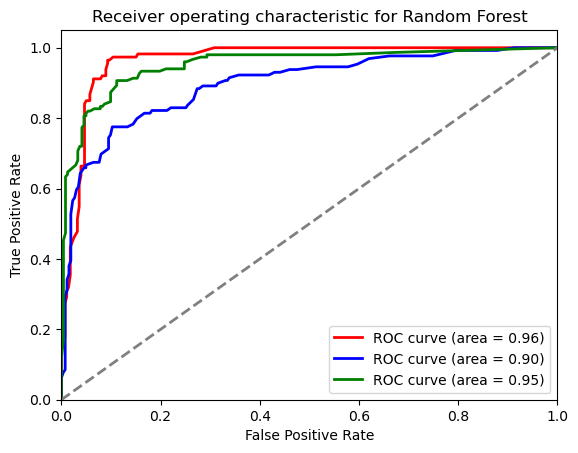

In [52]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# fit the random forest classifier
modelRF = RandomForestClassifier()
modelRF.fit(X_train,Y_train)

# get the predicted probabilities for the test data
Y_test_proba = modelRF.predict_proba(X_test)

# calculate the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(Y_test == i, Y_test_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# plot the ROC curve for each class
plt.figure()
lw = 2
colors = ['red', 'blue', 'green']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Random Forest')
plt.legend(loc="lower right")
plt.show()
